# Table of Content:
1. EDA - Original Dataset - 2017 onward <br>
    1.1 Data Acquisition and Exploration <br>
    1.2 Univariate Plots <br>
    1.3 Checking for Homoscedasticity <br>
    1.4 Statsmodels <br>
2. Data Cleaning and Wrangling - 2017 onward <br>
    2.1 Data Cleaning <br>
    2.2 Feature Engineering <br>
    2.3 Checking for Homoscedasticity <br>
    2.4 HDB Geospatial <br>
3. EDA and Feature Selection - 2017 onward <br>
    3.1 [Scatter Plots of Numerical Features](#Scatter-Plots-of-Numerical-Features) <br>
    3.2 [Histograms of Numerical Features](#Histograms-of-Numerical-Features) <br>
    3.3 [Histograms and Boxplots of Categorical Features](#Histograms-and-Boxplots-of-Categorical-Features) <br>
    3.4 [Encoding](#Encoding) <br>
    3.5 [Correlation Heatmap of Resale Price with All Features](#Correlation-Heatmap-of-Resale-Price-with-All-Features) <br>
    3.6 [Pairwise Correlation](#Pairwise-Correlation) <br>
    3.7 [Low Variance](#Low-Variance) <br>
    3.8 [Recursive Feature Elimination Cross Validation](#Recursive-Feature-Elimination-Cross-Validation) <br>
    3.9 [CART and Boosted Feature Importance](#CART-and-Boosted-Feature-Importance) <br>
    3.10 [Permutation Feature Importance](#Permutation-Feature-Importance) <br>
    3.11 [Final Feature Selection](#Final-Feature-Selection) <br>
4. Model Selection and Tuning - 2017 onward <br>
    4.1 Model Preparation <br>
    4.2 Conclusion <br>
    4.3 Benefits of the model <br>
    4.4 Limitations of the model <br>
    4.5 Future Work <br>
    4.6 Model Improvement <br>
    4.7 Web Application Improvement <br>

## EDA & Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.feature_selection import RFE, f_regression, SelectFromModel, RFECV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

from xgboost import XGBRegressor
import lightgbm as lgb

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# import the hdb dataframe
hdb = pd.read_csv('dataset/resale_hdb_price_2017_onward_updated9.csv')

In [3]:
# Check the data shape
print('Number of data:',hdb.shape[0])
print('This dataframe has',hdb.shape[1],'features.')
print('-'*100)

# Check the top 5 of the data
print('Top 5 of the data')
display(hdb.head())
print('-'*100)

# Check the data types
print('Key information of the dataset')
print('')
display(hdb.info())

Number of data: 82590
This dataframe has 25 features.
----------------------------------------------------------------------------------------------------
Top 5 of the data


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,mean_floor,remaining_year,block_street,latitude,longitude,dist_to_mrt,dist_to_mall,dist_to_hawker,dist_to_child_centre,bedroom,bathroom,dist_to_city,dist_to_pri_sch
0,1,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,11,61,406 ANG MO KIO AVE 10,1.362005,103.853880,1011,1006,182,273,1,1,8237,1368
1,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,2,60,108 ANG MO KIO AVE 4,1.370943,103.837975,1295,896,418,99,2,2,9355,512
2,1,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,2,62,602 ANG MO KIO AVE 5,1.380709,103.835368,1069,1530,592,45,2,2,10474,785
3,1,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,5,62,465 ANG MO KIO AVE 10,1.366201,103.857201,947,879,242,45,2,2,8722,1952
4,1,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,2,62,601 ANG MO KIO AVE 5,1.381041,103.835132,1091,1574,617,0,2,2,10515,818


----------------------------------------------------------------------------------------------------
Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82590 entries, 0 to 82589
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   month                 82590 non-null  int64  
 1   town                  82590 non-null  object 
 2   flat_type             82590 non-null  object 
 3   block                 82590 non-null  object 
 4   street_name           82590 non-null  object 
 5   storey_range          82590 non-null  object 
 6   floor_area_sqm        82590 non-null  float64
 7   flat_model            82590 non-null  object 
 8   lease_commence_date   82590 non-null  int64  
 9   remaining_lease       82590 non-null  object 
 10  resale_price          82590 non-null  float64
 11  year                  82590 non-null  int64  
 12  mean_floor            82590 non-null  i

None

1. block: It is not an useful information for prediction because it is a number of the block and it means nothing when the number is by itself.
2. street_name: I have used this information combined with block to get the coordinates of each block. This feature is not useful for prediction.
3. storey_range: I have created mean_floor feature using this data. Integer data is more predictable than the object data. This feature is not useful for prediction.
4. remaining_lease: I have created remaining_year using this data. Integer data is more predictable than the object data. This feature is not useful for prediction.
5. block_street: This feature is the concatenation of block and street_name. I have used this information to find the latitude and longitude of the block flat. It is not useful for prediction.
6. latitude/ longitude: I managed to get the distance of the each HDB block to the nearest amenities. This feature is not useful for prediction.

In [4]:
# drop the features that are not useful for the prediction
hdb = hdb.drop(columns=['block', 'street_name', 'storey_range', 'remaining_lease',
                        'block_street', 'latitude', 'longitude'])

In [5]:
hdb.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mean_floor,remaining_year,dist_to_mrt,dist_to_mall,dist_to_hawker,dist_to_child_centre,bedroom,bathroom,dist_to_city,dist_to_pri_sch
0,1,ANG MO KIO,2 ROOM,44.0,Improved,1979,232000.0,2017,11,61,1011,1006,182,273,1,1,8237,1368
1,1,ANG MO KIO,3 ROOM,67.0,New Generation,1978,250000.0,2017,2,60,1295,896,418,99,2,2,9355,512
2,1,ANG MO KIO,3 ROOM,67.0,New Generation,1980,262000.0,2017,2,62,1069,1530,592,45,2,2,10474,785
3,1,ANG MO KIO,3 ROOM,68.0,New Generation,1980,265000.0,2017,5,62,947,879,242,45,2,2,8722,1952
4,1,ANG MO KIO,3 ROOM,67.0,New Generation,1980,265000.0,2017,2,62,1091,1574,617,0,2,2,10515,818


### Scatter Plots of Numerical Features

In [6]:
# Create mask for numeric and categorical features
num_features = [col for col in hdb._get_numeric_data().columns]
num_features.remove('resale_price')
cat_features = [col for col in hdb.select_dtypes(include=['object']).columns]

In [7]:
num_features

['month',
 'floor_area_sqm',
 'lease_commence_date',
 'year',
 'mean_floor',
 'remaining_year',
 'dist_to_mrt',
 'dist_to_mall',
 'dist_to_hawker',
 'dist_to_child_centre',
 'bedroom',
 'bathroom',
 'dist_to_city',
 'dist_to_pri_sch']

In [8]:
# function for creating scatterplot for numerical features
def scatterplot(dataframe, list_of_columns, target):    
    nrows = int(np.ceil(len(list_of_columns)/2))
    ncols = 2
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 30))
    ax = ax.ravel()
    
    for i, col in enumerate(list_of_columns):
        g = sns.regplot(data=dataframe, x=col, y=target, ax=ax[i], ci=None, 
                        scatter_kws={'color':'blue','s':30},
                        line_kws={"color":"darkorange","lw":3})
        ax[i].set_title(col, fontsize=14)
        ax[i].set_xlabel('')
        plt.tight_layout()
    
    plt.suptitle('Scatterplot of Numerical Features vs Resale Price', fontsize=20, y=1.015)

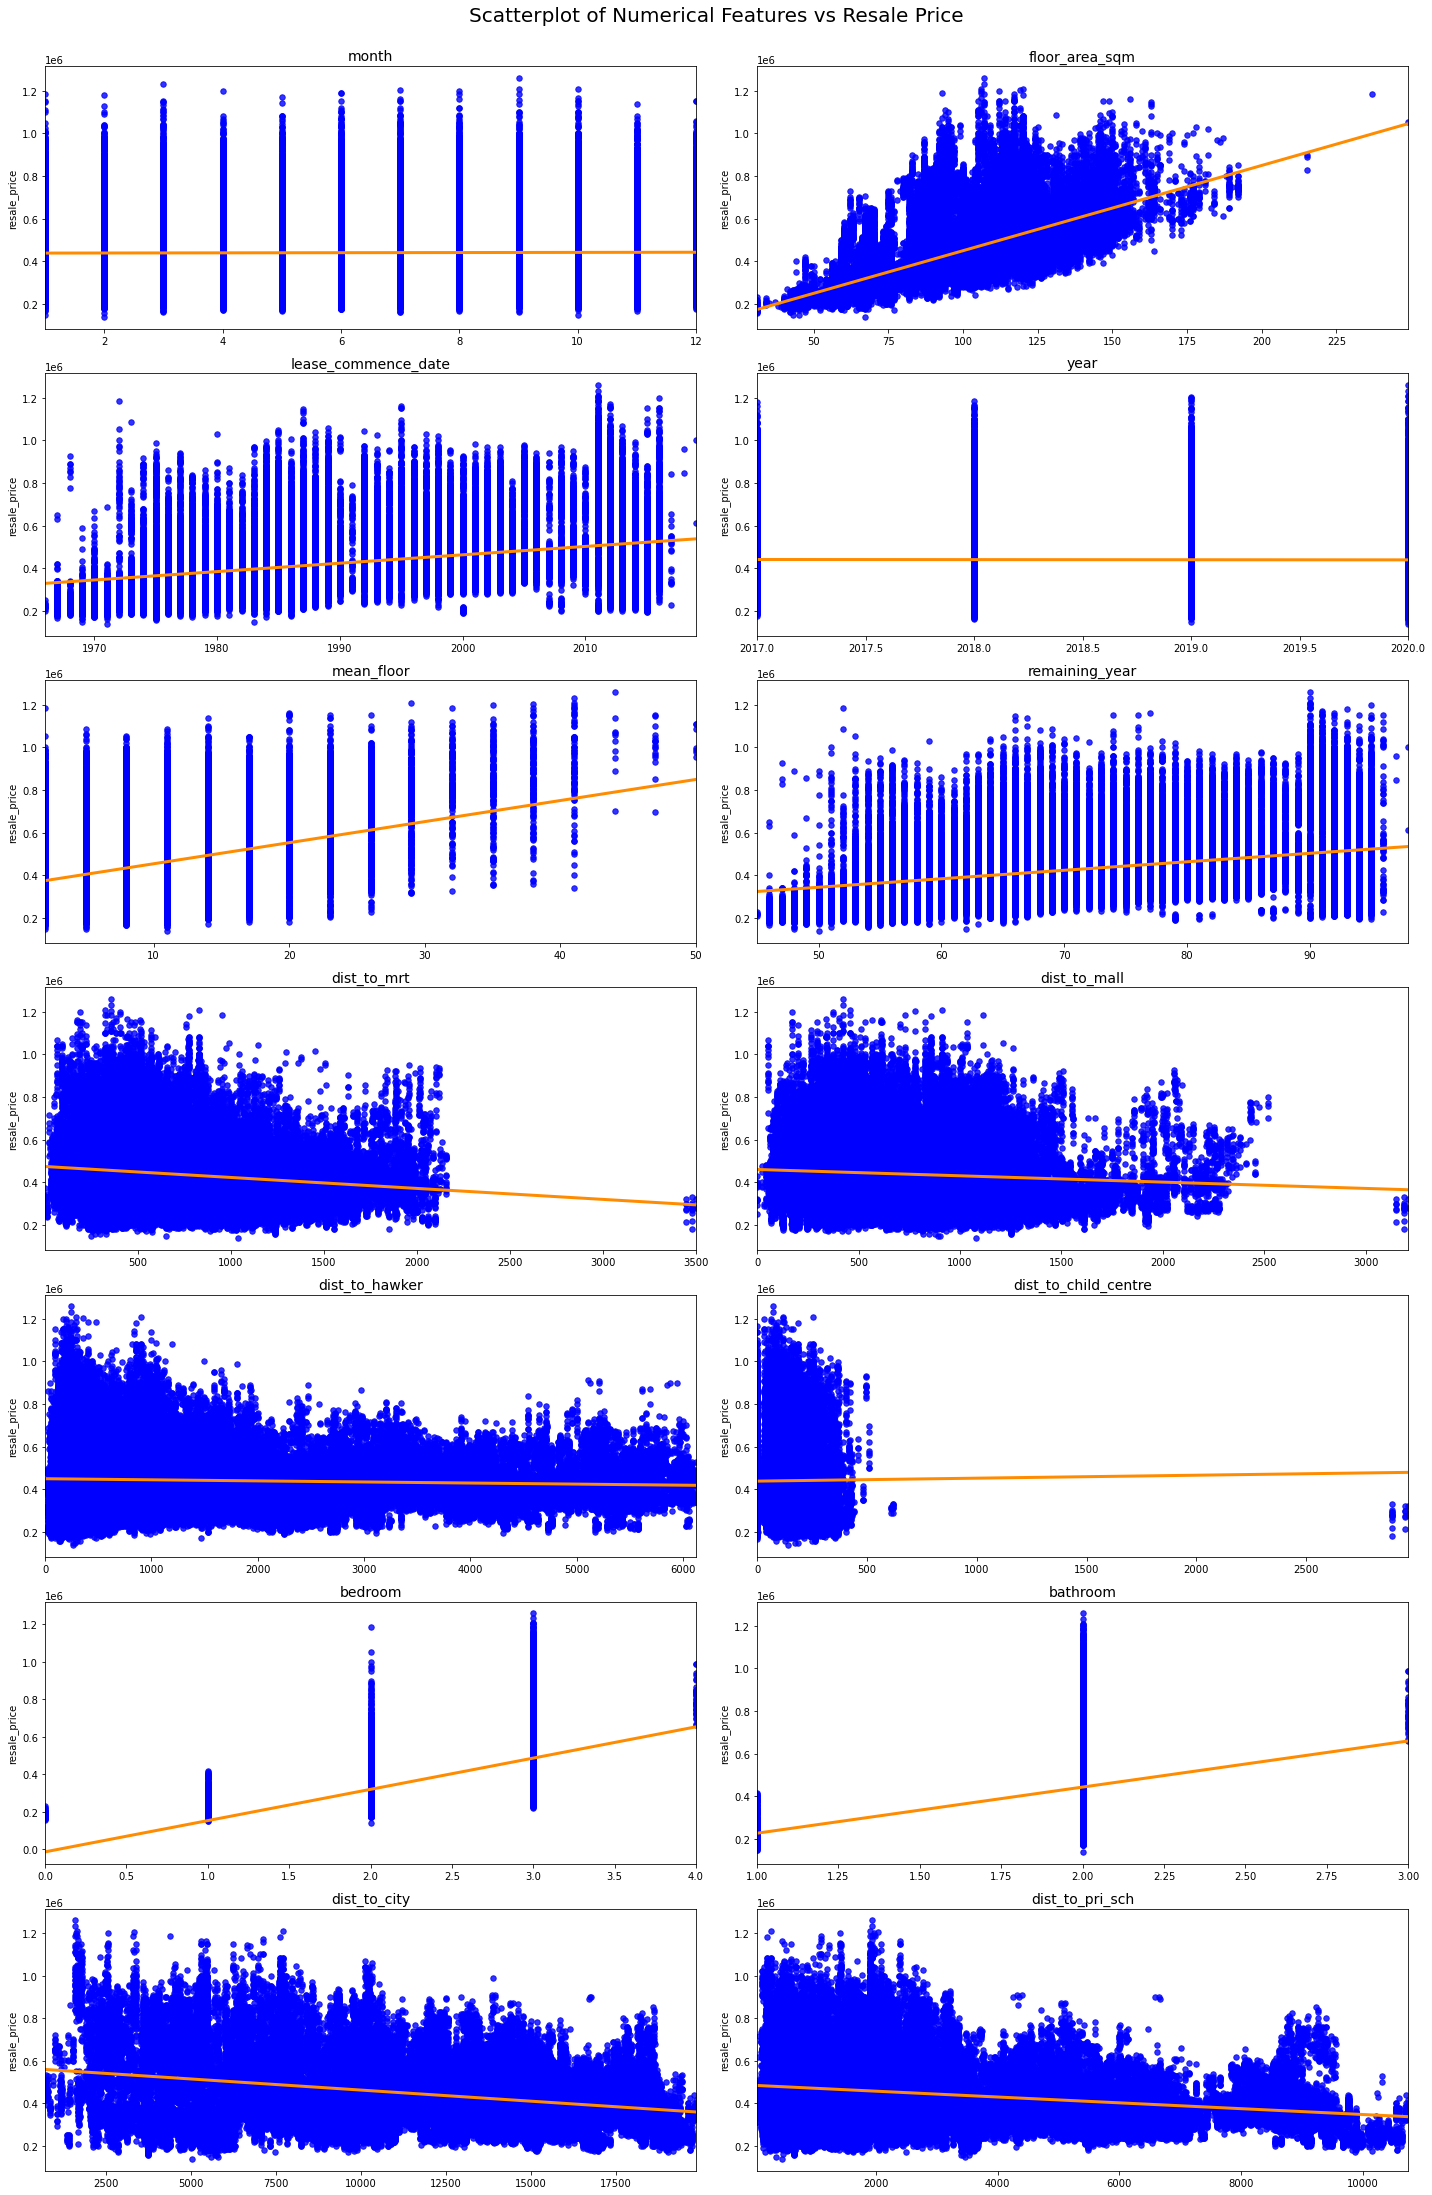

In [9]:
scatterplot(hdb, num_features, 'resale_price')

There are few features that have a strong positive relationship with the `resale_price`, such as `floor_area_sqm` and `mean_floor`, `bedroom`, `bathroom`. This make sense given that the size is the key consideration for bigger space in the house and bigger space will provides more bedrooms and bathrooms in the house. Higher storey HDB flat tenses to be cooler, less noise and most probably have better view (if the hdb has unblock view).

No surprise that the `dist_to_mrt`, `dist_to_mall`, `dist_to_city` and `dist_to_pri_sch` have the negative relationship to the `resale_price` because the closer to all the facilities, the faster you could reach the destination and save the travel time. However, it is surprised to discover that `dist_to_hawker` and `dist_to_child_centre` have almost zero relationship to the `resale_price`.

Time-based feature such as `month` and `year` have almost zero relationship with `resale_price`. `lease_commence_date` and `remaining_year` seem to have a slightly strong correlation with resale price because newer hdb tends to have better condition and the buyer will have higher chance to apply the housing loan from HDB or bank.

There are outliers in `floor_area_sqm`, `dist_to_mrt`, `dist_to_mall` and `dist_to_child_centre` which I will look into it.

In [10]:
# check the outlier in 'floor_area_sqm'
hdb[hdb['floor_area_sqm'] > 200]

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mean_floor,remaining_year,dist_to_mrt,dist_to_mall,dist_to_hawker,dist_to_child_centre,bedroom,bathroom,dist_to_city,dist_to_pri_sch
8798,6,KALLANG/WHAMPOA,3 ROOM,215.0,Terrace,1972,830000.0,2017,2,54,951,1104,465,115,2,2,4363,1105
13831,9,CHOA CHU KANG,EXECUTIVE,215.0,Premium Maisonette,1998,888000.0,2017,17,79,275,305,5852,189,3,2,16705,6669
19527,12,KALLANG/WHAMPOA,3 ROOM,249.0,Terrace,1972,1053888.0,2017,2,53,991,1211,664,284,2,2,4528,997
20656,1,CHOA CHU KANG,EXECUTIVE,215.0,Premium Maisonette,1998,900000.0,2018,11,79,171,214,5945,157,3,2,16728,6576
35596,9,KALLANG/WHAMPOA,3 ROOM,237.0,Terrace,1972,1185000.0,2018,2,52,955,1113,480,124,2,2,4376,1094


It is only 5 data so I have decided to remove them.

In [11]:
# check the outlier in 'dist_to_mrt'
hdb[hdb['dist_to_mrt'] > 3000]

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mean_floor,remaining_year,dist_to_mrt,dist_to_mall,dist_to_hawker,dist_to_child_centre,bedroom,bathroom,dist_to_city,dist_to_pri_sch
666,1,PASIR RIS,3 ROOM,66.0,Improved,1981,286000.0,2017,5,63,3478,3187,169,2890,2,2,18743,5486
5120,4,PASIR RIS,3 ROOM,66.0,Improved,1980,320000.0,2017,2,62,3502,3208,97,2963,2,2,18814,5556
8840,6,PASIR RIS,3 ROOM,77.0,Improved,1980,320000.0,2017,2,62,3446,3149,68,2948,2,2,18838,5576
10541,7,PASIR RIS,3 ROOM,66.0,Improved,1981,295000.0,2017,2,63,3478,3187,169,2890,2,2,18743,5486
12430,8,PASIR RIS,3 ROOM,66.0,Improved,1981,255000.0,2017,2,63,3478,3187,169,2890,2,2,18743,5486
14206,9,PASIR RIS,3 ROOM,66.0,Improved,1981,305000.0,2017,5,62,3478,3187,169,2890,2,2,18743,5486
20881,1,PASIR RIS,3 ROOM,66.0,Improved,1981,295000.0,2018,5,62,3478,3187,169,2890,2,2,18743,5486
22003,2,PASIR RIS,3 ROOM,74.0,Improved,1981,330000.0,2018,5,62,3478,3187,169,2890,2,2,18743,5486
31328,7,PASIR RIS,3 ROOM,66.0,Improved,1981,280000.0,2018,5,62,3478,3187,169,2890,2,2,18743,5486
31329,7,PASIR RIS,3 ROOM,66.0,Improved,1980,300000.0,2018,5,61,3446,3149,68,2948,2,2,18838,5576


In [12]:
hdb[hdb['dist_to_mrt'] > 3000]['dist_to_mrt'].value_counts()

3478    12
3446     6
3502     2
Name: dist_to_mrt, dtype: int64

It is only 20 data so I have decided to remove them.

In [13]:
# check the outlier in 'dist_to_mall'
hdb[hdb['dist_to_mall'] > 3000]

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mean_floor,remaining_year,dist_to_mrt,dist_to_mall,dist_to_hawker,dist_to_child_centre,bedroom,bathroom,dist_to_city,dist_to_pri_sch
666,1,PASIR RIS,3 ROOM,66.0,Improved,1981,286000.0,2017,5,63,3478,3187,169,2890,2,2,18743,5486
5120,4,PASIR RIS,3 ROOM,66.0,Improved,1980,320000.0,2017,2,62,3502,3208,97,2963,2,2,18814,5556
8840,6,PASIR RIS,3 ROOM,77.0,Improved,1980,320000.0,2017,2,62,3446,3149,68,2948,2,2,18838,5576
10541,7,PASIR RIS,3 ROOM,66.0,Improved,1981,295000.0,2017,2,63,3478,3187,169,2890,2,2,18743,5486
12430,8,PASIR RIS,3 ROOM,66.0,Improved,1981,255000.0,2017,2,63,3478,3187,169,2890,2,2,18743,5486
14206,9,PASIR RIS,3 ROOM,66.0,Improved,1981,305000.0,2017,5,62,3478,3187,169,2890,2,2,18743,5486
20881,1,PASIR RIS,3 ROOM,66.0,Improved,1981,295000.0,2018,5,62,3478,3187,169,2890,2,2,18743,5486
22003,2,PASIR RIS,3 ROOM,74.0,Improved,1981,330000.0,2018,5,62,3478,3187,169,2890,2,2,18743,5486
31328,7,PASIR RIS,3 ROOM,66.0,Improved,1981,280000.0,2018,5,62,3478,3187,169,2890,2,2,18743,5486
31329,7,PASIR RIS,3 ROOM,66.0,Improved,1980,300000.0,2018,5,61,3446,3149,68,2948,2,2,18838,5576


In [14]:
hdb[hdb['dist_to_mall'] > 3000]['dist_to_mall'].value_counts()

3187    12
3149     6
3208     2
Name: dist_to_mall, dtype: int64

It is only 20 data so I have decided to remove them.

In [15]:
# check the outlier in 'dist_to_child_centre'
hdb[hdb['dist_to_child_centre'] > 600]

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mean_floor,remaining_year,dist_to_mrt,dist_to_mall,dist_to_hawker,dist_to_child_centre,bedroom,bathroom,dist_to_city,dist_to_pri_sch
666,1,PASIR RIS,3 ROOM,66.0,Improved,1981,286000.0,2017,5,63,3478,3187,169,2890,2,2,18743,5486
5046,4,KALLANG/WHAMPOA,3 ROOM,60.0,Standard,1969,325000.0,2017,5,50,1082,1226,5826,617,2,2,15707,6421
5120,4,PASIR RIS,3 ROOM,66.0,Improved,1980,320000.0,2017,2,62,3502,3208,97,2963,2,2,18814,5556
8840,6,PASIR RIS,3 ROOM,77.0,Improved,1980,320000.0,2017,2,62,3446,3149,68,2948,2,2,18838,5576
10541,7,PASIR RIS,3 ROOM,66.0,Improved,1981,295000.0,2017,2,63,3478,3187,169,2890,2,2,18743,5486
12430,8,PASIR RIS,3 ROOM,66.0,Improved,1981,255000.0,2017,2,63,3478,3187,169,2890,2,2,18743,5486
14206,9,PASIR RIS,3 ROOM,66.0,Improved,1981,305000.0,2017,5,62,3478,3187,169,2890,2,2,18743,5486
17758,11,KALLANG/WHAMPOA,3 ROOM,60.0,Standard,1969,313000.0,2017,8,50,1082,1226,5826,617,2,2,15707,6421
20881,1,PASIR RIS,3 ROOM,66.0,Improved,1981,295000.0,2018,5,62,3478,3187,169,2890,2,2,18743,5486
22003,2,PASIR RIS,3 ROOM,74.0,Improved,1981,330000.0,2018,5,62,3478,3187,169,2890,2,2,18743,5486


In [16]:
hdb[hdb['dist_to_child_centre'] > 600]['dist_to_child_centre'].value_counts()

2890    12
617      7
2948     6
608      4
2963     2
Name: dist_to_child_centre, dtype: int64

It is only 31 data so I have decided to remove them.

Seem like there are numbers of outliers are from the same data that appeared in `dist_to_mrt`, `dist_to_mall` and `dist_to_child_centre` features. In order to have a precise predictive model, I will remove all the outliers.

In [17]:
# remove the outliers in 'floor_area_sqm' feature
hdb.drop(hdb[hdb['floor_area_sqm'] > 200].index, inplace=True)

In [18]:
# remove the outliers in 'dist_to_child_centre' feature
hdb.drop(hdb[hdb['dist_to_child_centre'] > 600].index, inplace=True)

In [19]:
# Check the data shape
print('Updated number of data:',hdb.shape[0])

Updated number of data: 82554


The number of the data has decreased from 82590 to 82554 after all the outliers (0.05% of the original data) have removed.

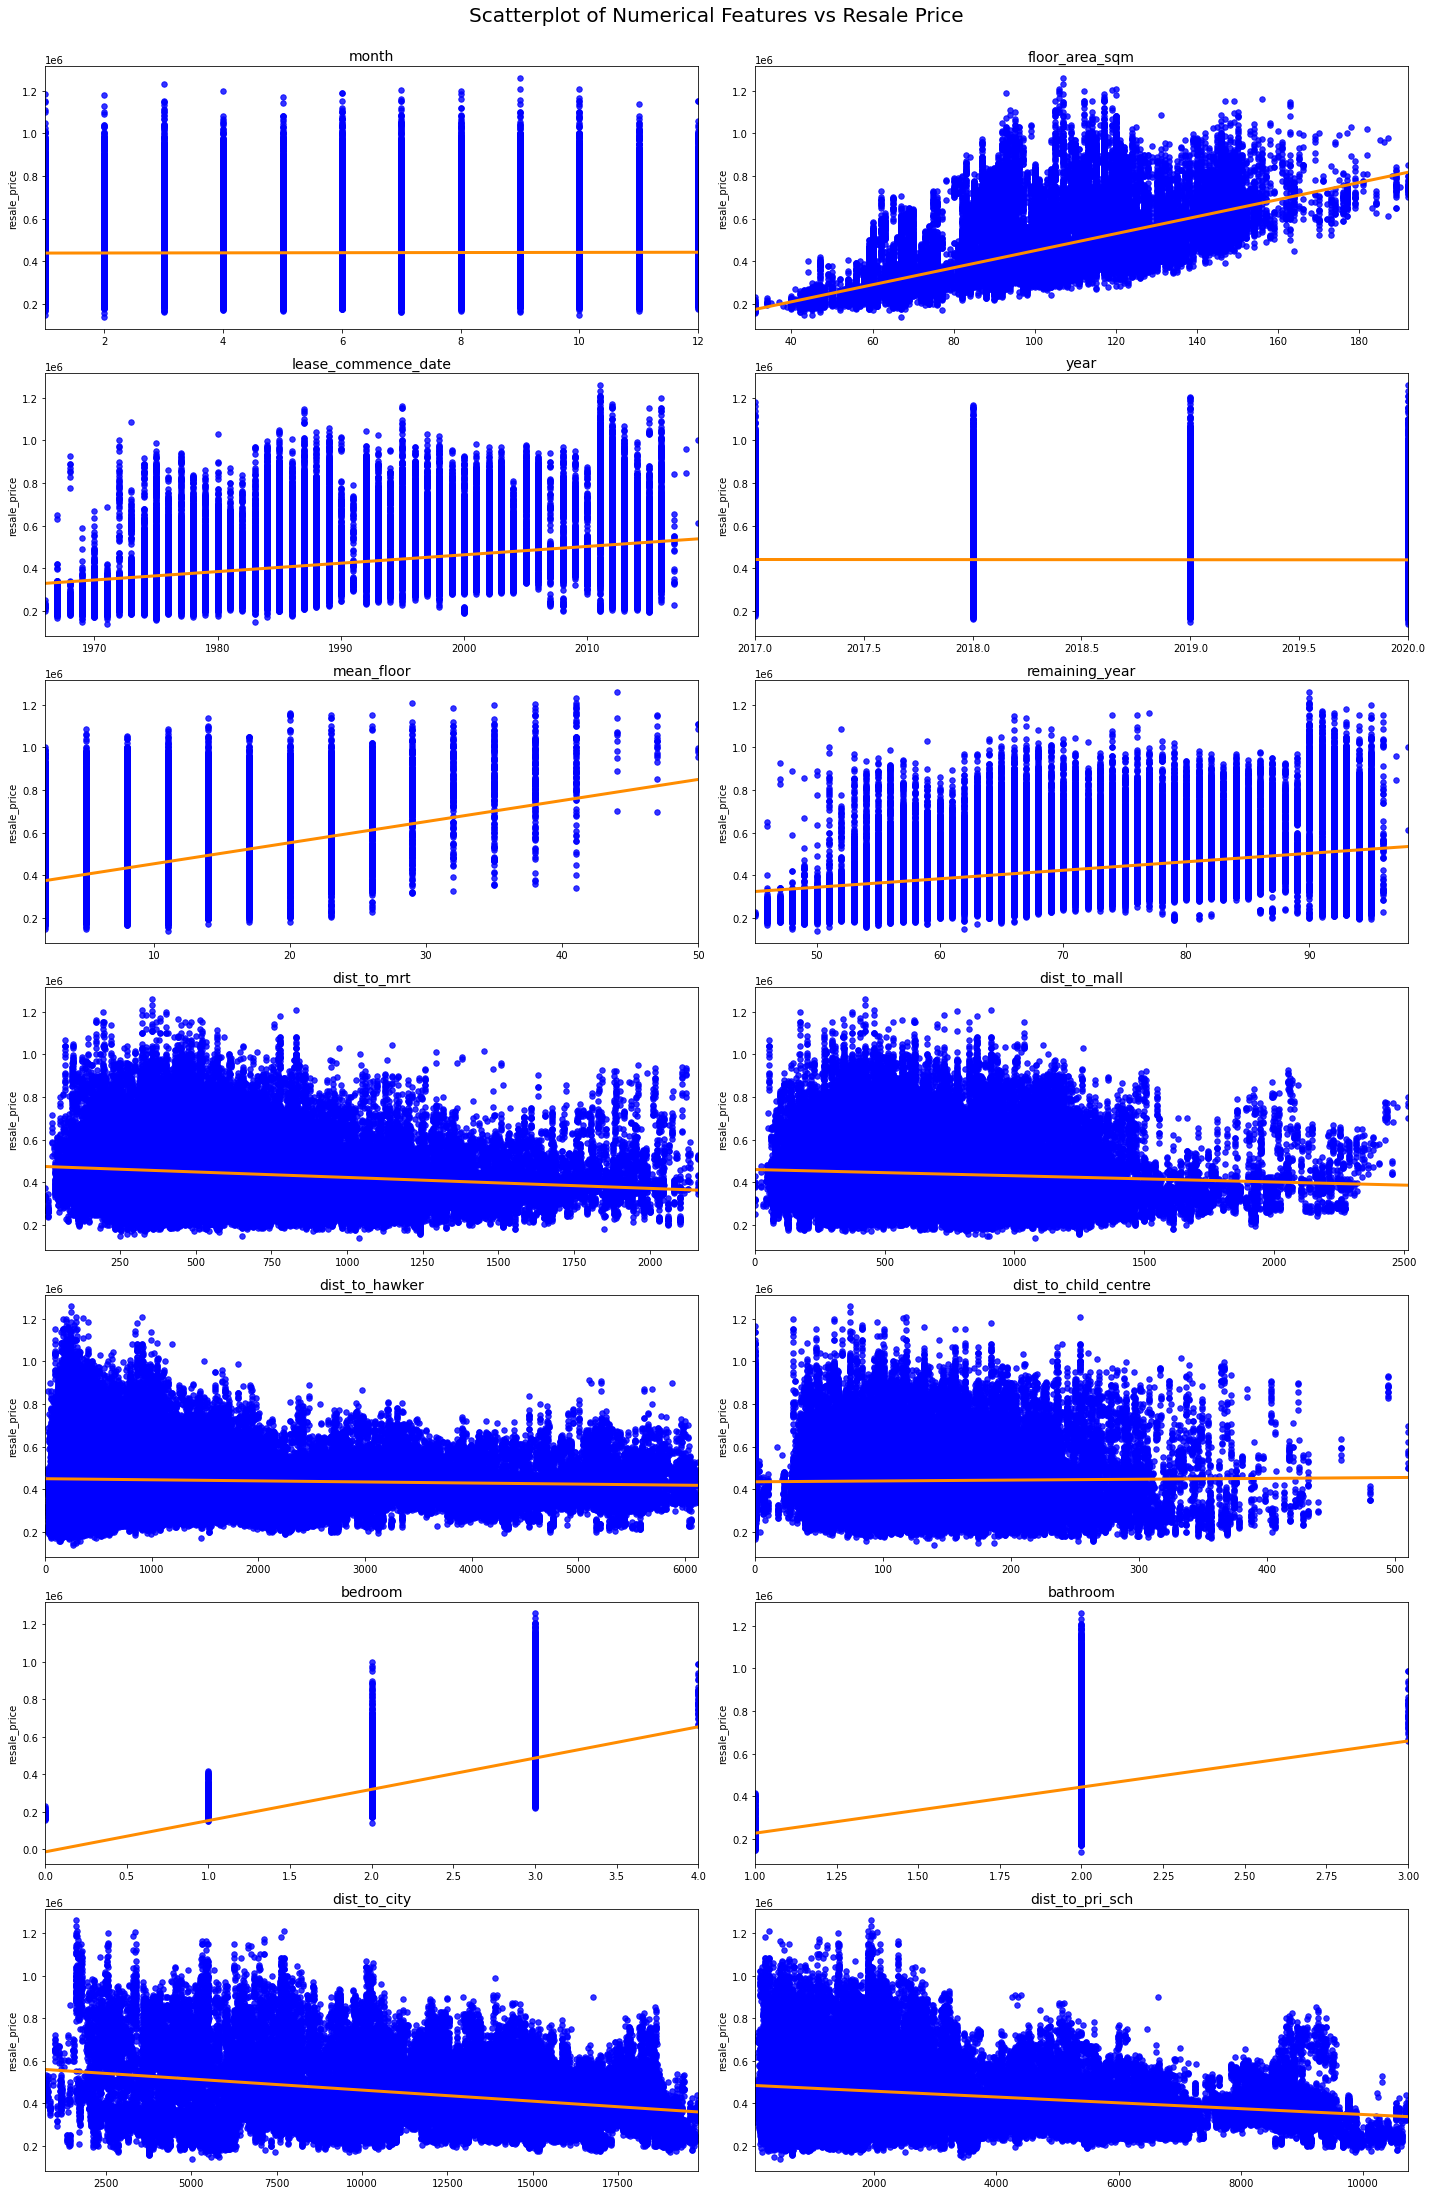

In [20]:
# Draw regression plots for the 'saleprice' versus numerical features
scatterplot(hdb, num_features, 'resale_price')

### Histograms of Numerical Features

In [21]:
# Custom function for plotting of numerical features
def histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) 
    ncols = 3
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=(15, 15)) 
    ax = ax.ravel() 
    for i, col in enumerate(list_of_columns): 
        sns.distplot(dataframe[col], kde=False, ax=ax[i], color='blue')
        ax[i].set_title(col,fontsize=14)
        ax[i].set_xlabel('')
        ax[i].tick_params(labelsize=10)
    plt.tight_layout()
    
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1
        
    plt.suptitle('Histograms of Numerical Features', fontsize=20, y=1.015)

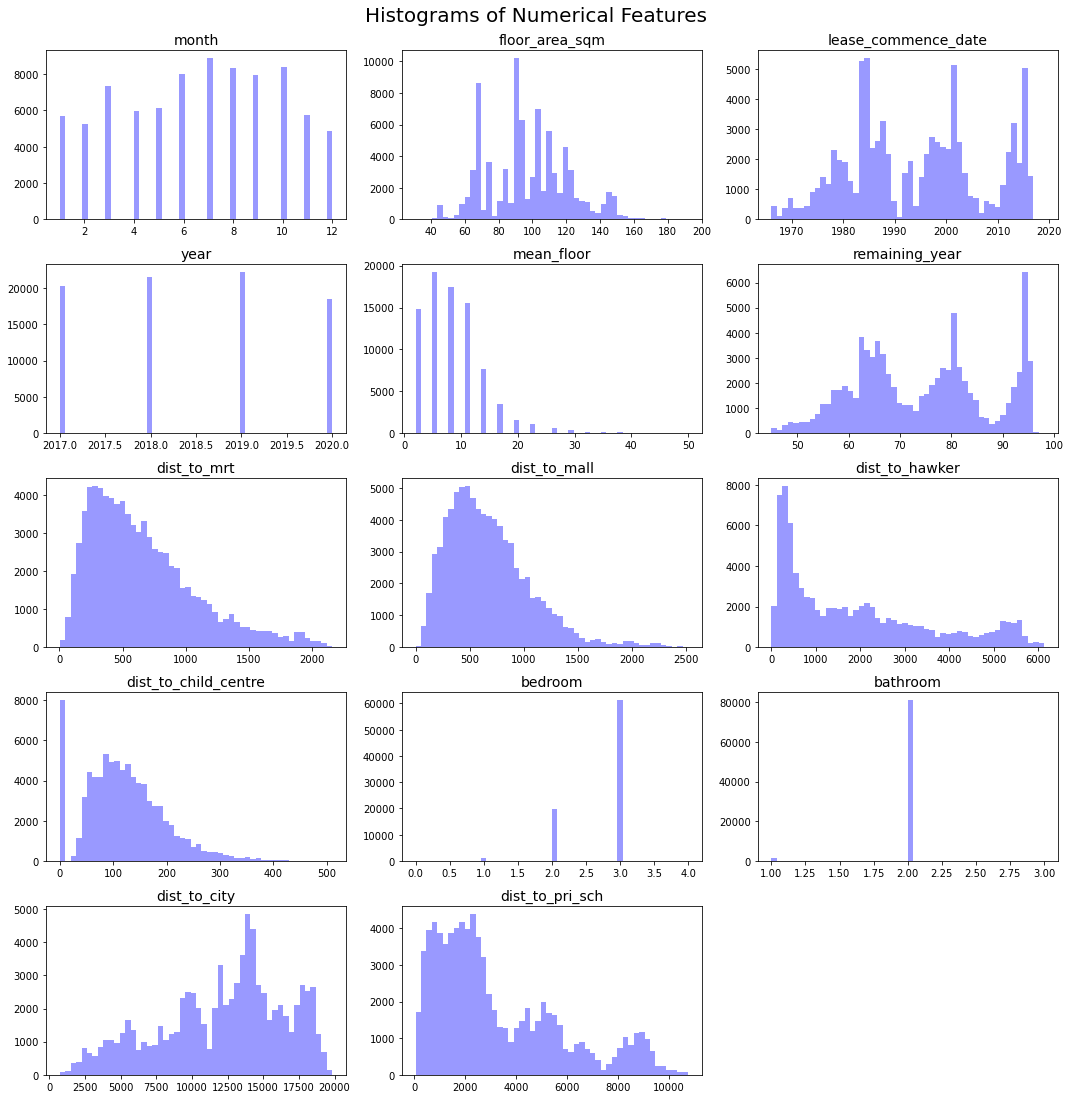

In [22]:
# Histograms of numerical data
histograms(hdb, num_features)

In [23]:
hdb['bedroom'].value_counts(normalize=True)

3    0.743005
2    0.240594
1    0.015481
4    0.000485
0    0.000436
Name: bedroom, dtype: float64

In [24]:
hdb['bathroom'].value_counts(normalize=True)

2    0.983599
1    0.015917
3    0.000485
Name: bathroom, dtype: float64

`bathroom` feature has one value is heavily over-presented. If I apply this features into my prediction, the chances of the prediction of using the over-presented data point will be higher as well, which will not be good for my prediction.

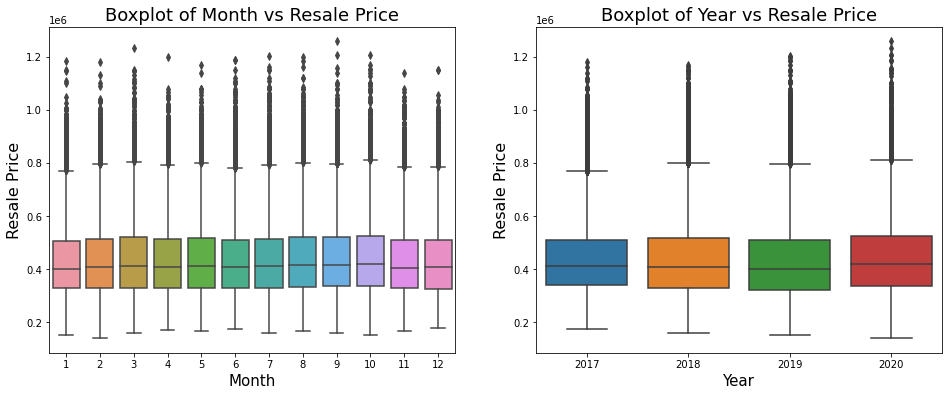

In [25]:
fig, [ax1, ax2] = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
sns.boxplot(x='month', y='resale_price', data=hdb, ax=ax1)
ax1.set_title('Boxplot of Month vs Resale Price', fontsize = 18)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('Resale Price', fontsize=16)

sns.boxplot(x='year', y='resale_price', data=hdb, ax=ax2)
ax2.set_title('Boxplot of Year vs Resale Price', fontsize = 18)
ax2.set_xlabel('Year', fontsize=15)
ax2.set_ylabel('Resale Price', fontsize=16);

From the boxplot above, we can see that the median `resale_price` of the `month` and `year` hardly have any difference between each other, which mean the subset are likely to have very similar variances. So I will not use these features for my prediction.

In [26]:
hdb = hdb.drop(['bathroom', 'month', 'year'], axis=1)

### Histograms and Boxplots of Categorical Features

In [27]:
def cat_plotter(x_fea, y_fea, data):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
    
    sns.countplot(x=x_fea, data=data, ax=ax1, order=data[x_fea].value_counts().index)
    ax1.set_title(f'Histogram of {x_fea}', fontsize = 18)
    ax1.set_xlabel(x_fea, fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
    ax1.set_ylabel('Frequency count', fontsize=16)
    
    sns.boxplot(x=x_fea, y=y_fea, data=hdb, ax=ax2)
    ax2.set_title(f'Boxplot of {x_fea} vs Resale Price', fontsize = 18)
    ax2.set_xlabel(x_fea, fontsize=15)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=70)
    ax2.set_ylabel('Resale Price', fontsize=16)
        
    fig.tight_layout()
    plt.show()

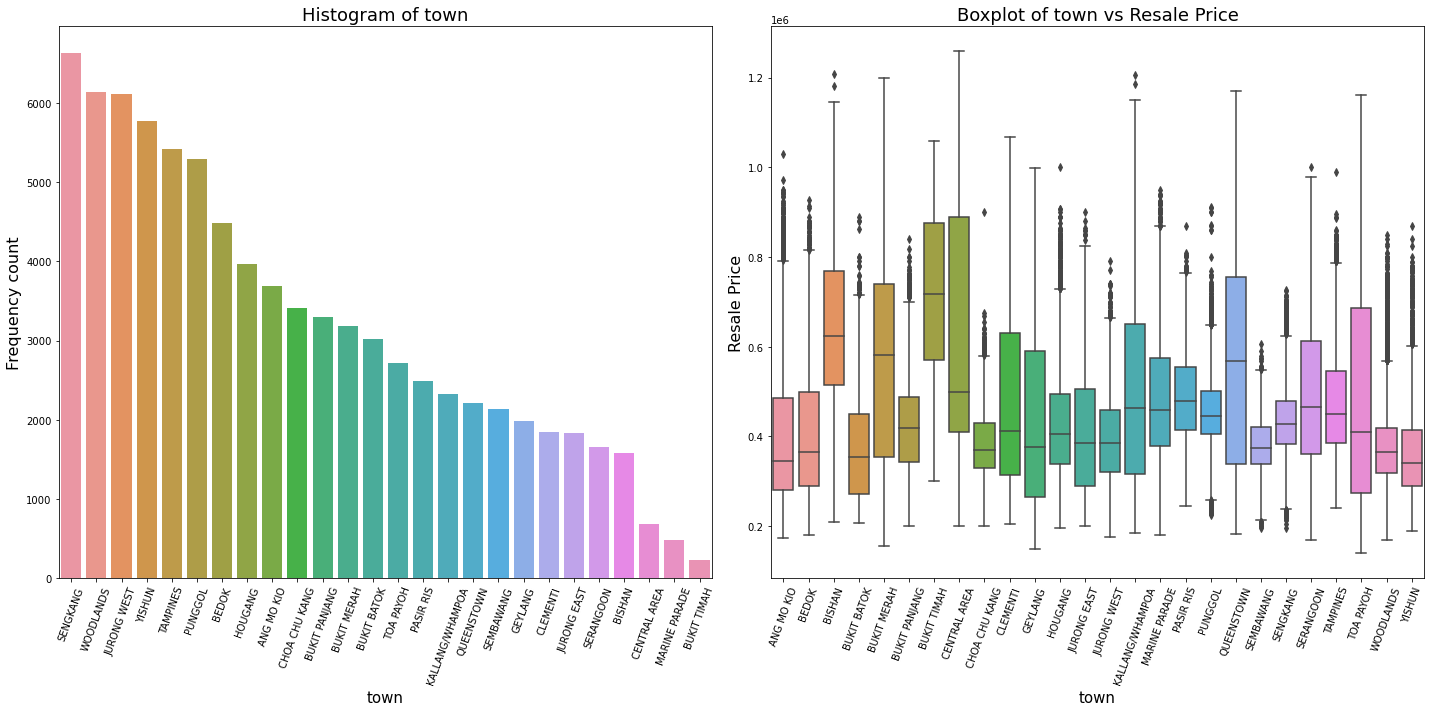

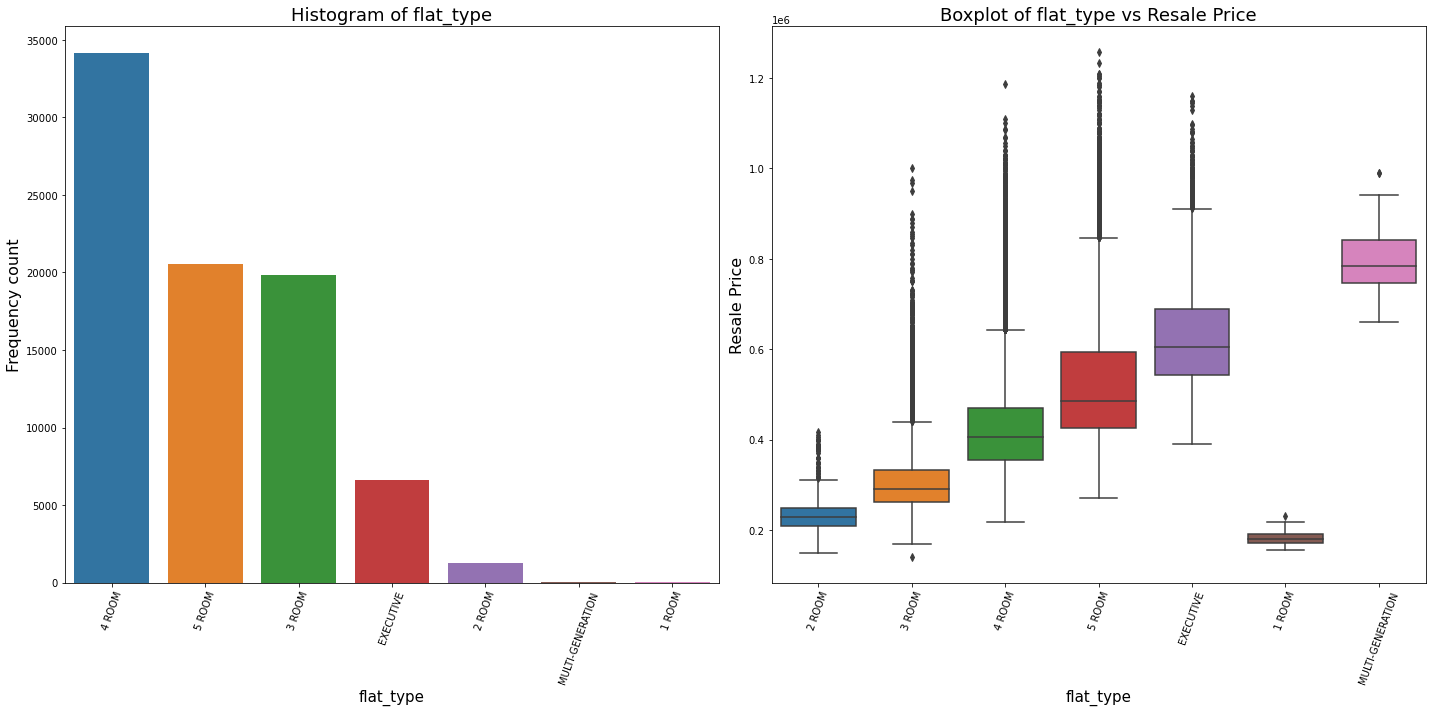

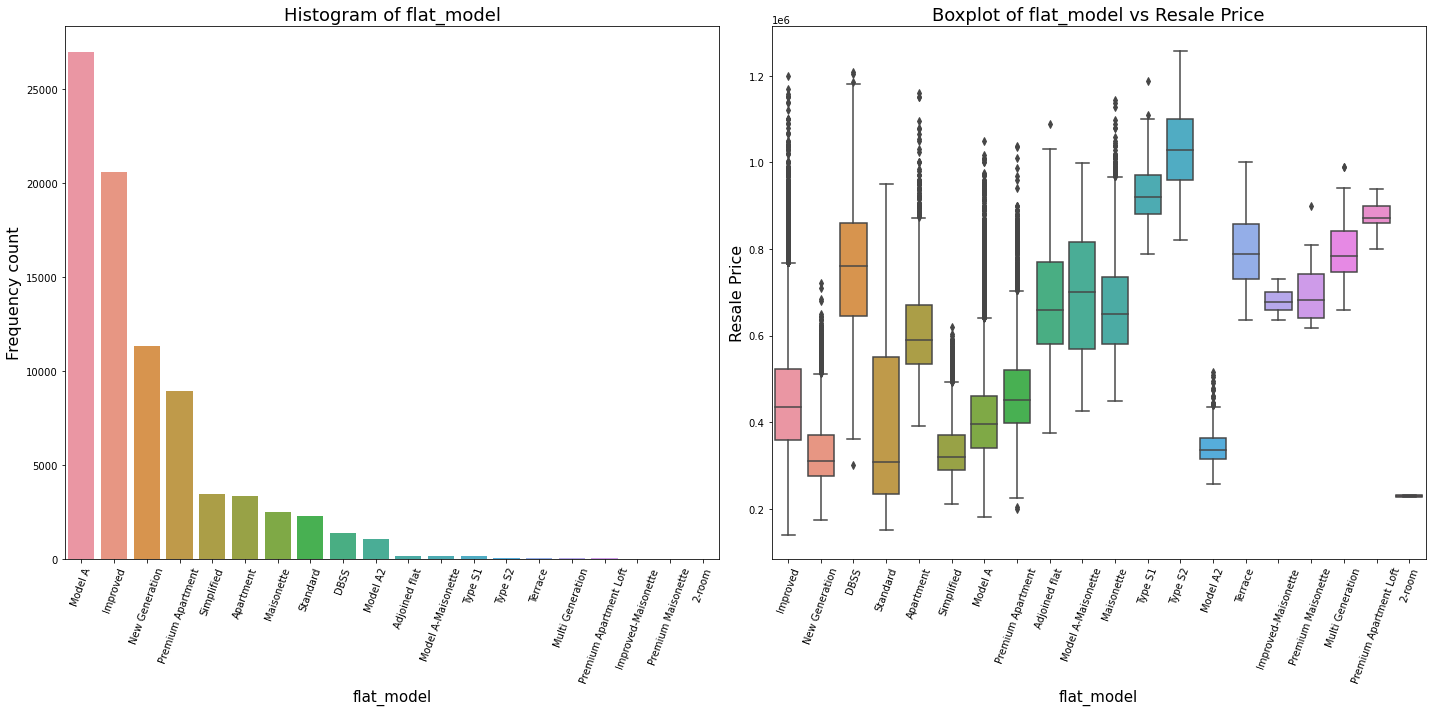

In [28]:
for c in cat_features:
    cat_plotter(c,hdb['resale_price'], hdb)

We can see that all the categorical features seem to have a strong relationship with the `resale price` because the median `resale price` of the sub-features have a huge difference between each other.

__town__
- Sengkang, Woodland and Jurong West have the highest sale occurrences.
- The most expensive HDB area is the central area, Bukit Merah and Bishan.

__flat type__
- There are much fewer 1 Room, 2 Room, Multi-Generation and Executive flats compare to 3, 4 and 5 Room HDB flat.
- The most common flat type is 4 Room, 5 Room and 3 Room.

__flat model__
- Model A, Improved and New Generation are the most common HDB model.
- Prices vary widely, which is probably due to some flat model size is smaller, poor design or old flat.

### Encoding

I will one hot encode all the categorical features as they generally don't have any form of rank or order.

In [29]:
hdb = pd.get_dummies(data=hdb, columns=cat_features)

In [30]:
print(f'After encoding, I now have {hdb.shape[0]} observations and {hdb.shape[1]} features.')

After encoding, I now have 82554 observations and 65 features.


### Correlation Heatmap of Resale Price with All Features

I will do a quick visualization to get a rough sense of how my current features are correlated with the `resale price`.

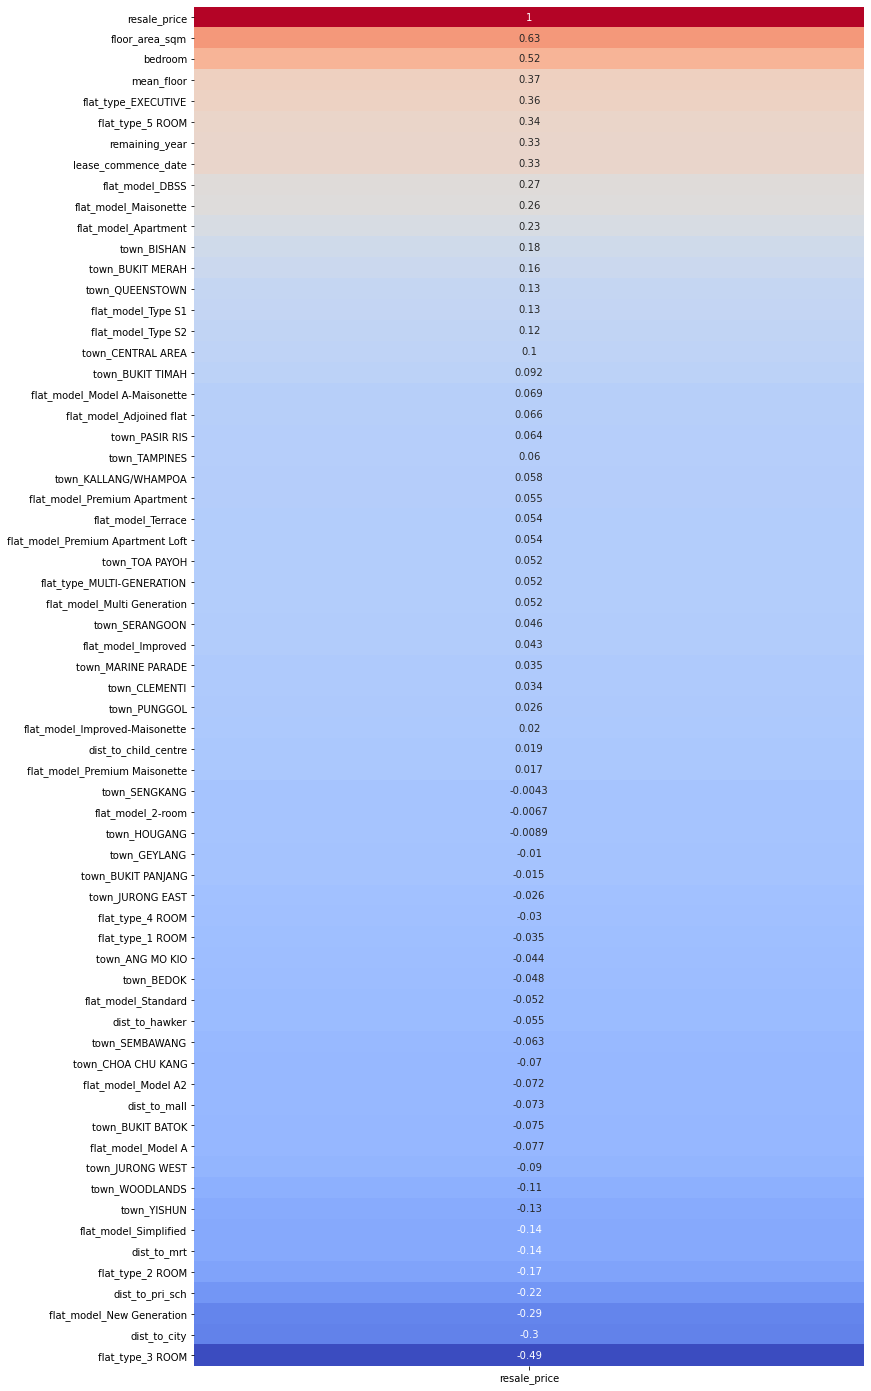

In [31]:
# Check correlation for all variables
plt.figure(figsize=(12,25))
sns.heatmap(hdb.corr()[['resale_price']].sort_values(by='resale_price', ascending=False), cmap='coolwarm', annot=True, cbar=False);

In [32]:
# top 10 features that have a strong positive correlation to'resale_price'
hdb.corr()['resale_price'].sort_values(ascending=False).head(11)

resale_price             1.000000
floor_area_sqm           0.630707
bedroom                  0.523433
mean_floor               0.369954
flat_type_EXECUTIVE      0.356945
flat_type_5 ROOM         0.336581
remaining_year           0.332453
lease_commence_date      0.329892
flat_model_DBSS          0.269432
flat_model_Maisonette    0.264348
flat_model_Apartment     0.227789
Name: resale_price, dtype: float64

In [33]:
# top 10 features that have a strong negative correlation to'resale_price'
hdb.corr()['resale_price'].sort_values(ascending=False).tail(10)

town_JURONG WEST            -0.089916
town_WOODLANDS              -0.111688
town_YISHUN                 -0.134799
flat_model_Simplified       -0.137303
dist_to_mrt                 -0.141060
flat_type_2 ROOM            -0.168943
dist_to_pri_sch             -0.223291
flat_model_New Generation   -0.287045
dist_to_city                -0.298384
flat_type_3 ROOM            -0.485412
Name: resale_price, dtype: float64

Based on the heatmap, the top 10 most positively correlated features are:

1. floor_area_sqm           :0.630707
2. bedroom                  :0.523433
3. mean_floor               :0.369954
4. flat_type_EXECUTIVE      :0.356945
5. flat_type_5 ROOM         :0.336581
6. remaining_year           :0.332453
7. lease_commence_date      :0.329892
8. flat_model_DBSS          :0.269432
9. flat_model_Maisonette    :0.264348
10. flat_model_Apartment    :0.227789

It seems that `floor_area_sqm`, `bedroom` and `mean_floor` have a very high correlation with the `resale_price` follow the flat_type, time based features and flat_model.

The top 10 most negatively correlated features are:
1. town_JURONG WEST            :-0.089916
2. town_WOODLANDS              :-0.111688
3. town_YISHUN                 :-0.134799
4. flat_model_Simplified       :-0.137303
5. dist_to_mrt                 :-0.141060
6. flat_type_2 ROOM            :-0.168943
7. dist_to_pri_sch             :-0.223291
8. flat_model_New Generation   :-0.287045
9. dist_to_city                :-0.298384
10. flat_type_3 ROOM           :-0.485412

The negative correlated features range from town, flat type and distance to various amenities.

We will look into different comparison before we start to exclude more features for prediction.

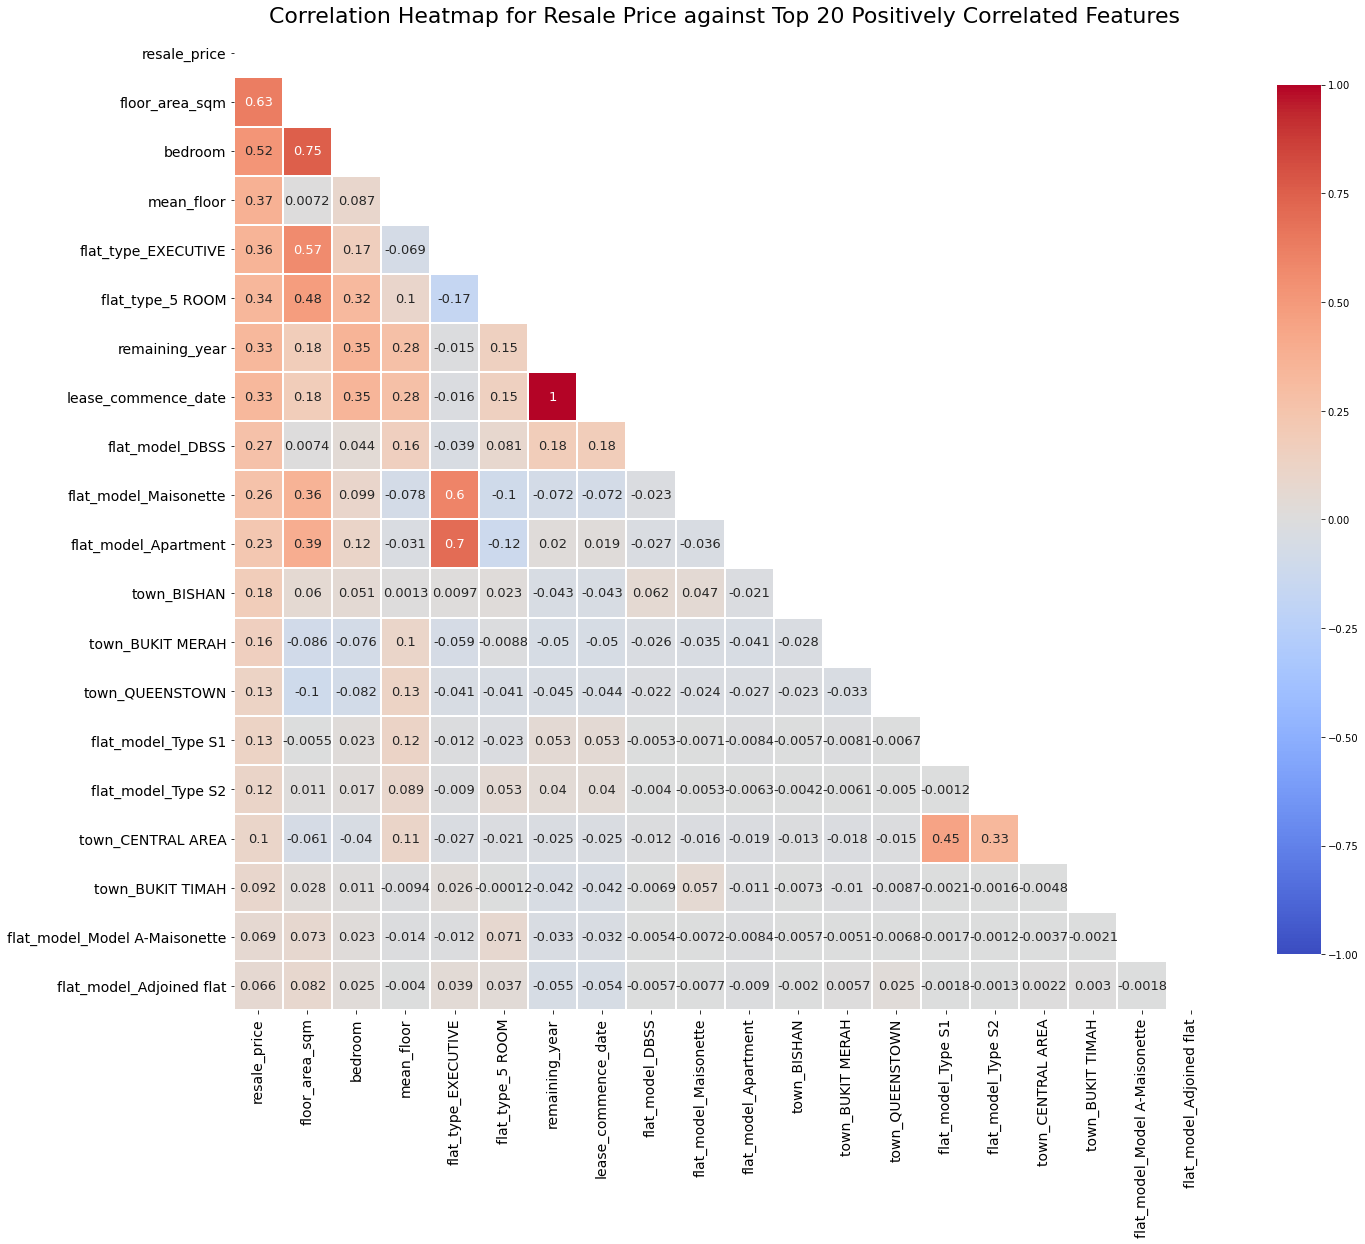

In [34]:
# use heatmap to show the correlation between top twenty positively correlated
top_corr = hdb.corr()['resale_price'].sort_values(ascending=False).head(20).index

#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(22,20))
mask = np.triu(np.ones_like(hdb[top_corr].corr(), dtype=bool))

ax = sns.heatmap(hdb[top_corr].corr(), mask=mask, cmap='coolwarm',vmin=-1, vmax=1,
                 square=True, linewidth=1,annot=True,annot_kws={'size':'13'},
                 cbar_kws={"shrink": 0.8},fmt='.2g',center=0)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

ax.set_title('Correlation Heatmap for Resale Price against Top 20 Positively Correlated Features', fontsize=22);

Looking at the heat map above, we can observe that `remaining_year` and `lease_commence_date` generally have a high level of multicollinearity. 

This is a problem because when we using too many correlated features, it may cause the model to consider too many unnecessary features, leading to the curse of dimensionality. In other words, high correlation between our variables might reduce the precision of our estimate coefficients, which might then weaken the statistical power of our model.

### Pairwise Correlation

High correlation between two variables mean they have similar trends and are likely to carry similar information. Having a perfect pairwise correlation between two variables mean that one of the variable is redundant. Keeping only the one that has a higher correlation coefficient with the target will help reduce dimensionality without much loss of information.

In [35]:
corr_matrix = hdb.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
                  .astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

# Convert to dataframe and reset multi-level index
corr_df = pd.DataFrame(sol.head(50)).reset_index()

# Rename columns
corr_df.columns = 'v1', 'v2', 'pair_corr'

In [36]:
def corr_target(row):
    row['v1_y_corr'] = hdb.corr()['resale_price'][row['v1']]
    row['v2_y_corr'] = hdb.corr()['resale_price'][row['v2']]
    return row

In [37]:
# Create df with pairwise correlation and correlation to target
corr_df = corr_df.apply(corr_target, axis=1)

I created a table of variables sorted by their level of pairwise correlation to each other. If the features provided identical information, I will drop one of the variables. In other case, I selected the variable that had a better correlation to `resale_price`.

In [38]:
corr_df.head(10)

,v1,v2,pair_corr,v1_y_corr,v2_y_corr
0,flat_type_MULTI-GENERATION,flat_model_Multi Generation,1.000000,0.051747,0.051747
1,lease_commence_date,remaining_year,0.996219,0.329892,0.332453
2,bedroom,flat_type_3 ROOM,0.848944,0.523433,-0.485412
3,floor_area_sqm,bedroom,0.752214,0.630707,0.523433
4,flat_type_EXECUTIVE,flat_model_Apartment,0.696854,0.356945,0.227789
5,floor_area_sqm,flat_type_3 ROOM,0.683133,0.630707,-0.485412
6,dist_to_city,dist_to_pri_sch,0.642744,-0.298384,-0.223291
7,floor_area_sqm,resale_price,0.630707,0.630707,1.000000
8,dist_to_pri_sch,town_WOODLANDS,0.617321,-0.223291,-0.111688
9,flat_type_5 ROOM,flat_model_Improved,0.595963,0.336581,0.043373


In [39]:
# Dropping due to perfect pairwise correlation score of almost 1
hdb = hdb.drop(['flat_type_MULTI-GENERATION', 'lease_commence_date'], axis=1)

### Low Variance

I have noticed earlier many of the features have the same value. In other words, these features are approximately constant and will not improve the performance of the model. This also applies if only a handful of observations differ from a constant value. Variables with close to zero variance also violate the multivariate normality assumption of multiple linear regression.

Below is the list of the features with low variances. Further research to be carry out before I proceed to remove more features.

In [40]:
low_var_list = hdb.var().sort_values(ascending=False)
low_var_list = low_var_list[low_var_list.values < 0.05]
low_var_list

town_HOUGANG                         0.045778
town_ANG MO KIO                      0.042656
flat_model_Simplified                0.039878
town_CHOA CHU KANG                   0.039589
flat_model_Apartment                 0.039067
town_BUKIT PANJANG                   0.038376
town_BUKIT MERAH                     0.037093
town_BUKIT BATOK                     0.035188
town_TOA PAYOH                       0.031761
town_PASIR RIS                       0.029264
flat_model_Maisonette                0.029139
town_KALLANG/WHAMPOA                 0.027325
flat_model_Standard                  0.027176
town_QUEENSTOWN                      0.026111
town_SEMBAWANG                       0.025182
town_GEYLANG                         0.023409
town_CLEMENTI                        0.021827
town_JURONG EAST                     0.021746
town_SERANGOON                       0.019599
town_BISHAN                          0.018785
flat_model_DBSS                      0.016683
flat_type_2 ROOM                  

### Recursive Feature Elimination Cross Validation

[RFE](https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html#:~:text=Recursive%20feature%20elimination%20(RFE)%20is,number%20of%20features%20is%20reached.) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Technically RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally. RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains. Features are then ranked according to when they were eliminated. As such, it is a greedy optimization for finding the best performing subset of features. 

RFE requires a specified number of features to keep, however it is often not known in advance how many features are valid. To find the optimal number of features, cross-validation is used with RFE (RFECV). The [RFECV](https://www.quora.com/scikit-learn-How-does-RFECV-make-use-of-cross-validation) object helps to tune or find this n_features parameter using cross-validation. For every step where "step" number of features are eliminated, it calculates the score on the validation data. The number of features left at the step which gives the maximum score on the validation data, is considered to be "the best n_features" of your data.

I have written a function that will perform RFECV process with the selected model on the whole dataset and return the RMSE. RFECV will automatically choose the number of selected features. It is recommended that use the same model for both RFECV model and Pipeline model.

In [ ]:
X = hdb.drop(columns=['resale_price'])
y = hdb['resale_price']

In [44]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # LinearRegression
    rfe = RFECV(estimator=LinearRegression())
    model = DecisionTreeRegressor()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # Ridge
    rfe = RFECV(estimator=Ridge(random_state=42))
    model = DecisionTreeRegressor()
    models['rd'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # Lasso
    rfe = RFECV(estimator=Lasso(random_state=42))
    model = DecisionTreeRegressor()
    models['ls'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # DecisionTreeRegressor
    rfe = RFECV(estimator=DecisionTreeRegressor(max_depth=20, random_state=42))
    model = DecisionTreeRegressor()
    models['dt'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # ExtraTreesRegressor
    rfe = RFECV(estimator=ExtraTreesRegressor(n_estimators=300, max_depth=20, random_state=42))
    model = DecisionTreeRegressor()
    models['et'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # RandomForestRegressor
    rfe = RFECV(estimator=RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42))
    model = DecisionTreeRegressor()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # GradientBoostingRegressor
    rfe = RFECV(estimator=GradientBoostingRegressor(n_estimators=300, max_depth=20, random_state=42))
    model = DecisionTreeRegressor()
    models['gb'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # XGBRegressor
    rfe = RFECV(estimator=XGBRegressor(n_estimators=300, max_depth=20, random_state=42))
    model = DecisionTreeRegressor()
    models['xg'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # LGBMRegressor
    rfe = RFECV(estimator=lgb.LGBMRegressor(n_estimators=300, max_depth=20, random_state=42))
    model = DecisionTreeRegressor()
    models['lg'] = Pipeline(steps=[('s',rfe),('m',model)])    
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    scores = (-cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5 , n_jobs=-1, verbose=1)).mean()
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    print('>%s CV RMSE: %.2f' % (name, scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>lr CV RMSE: 37461.04


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>rd CV RMSE: 37538.99


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 24.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>ls CV RMSE: 37369.41


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.8min finished


>dt CV RMSE: 37850.46


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 296.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>et CV RMSE: 37888.50


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 509.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>rf CV RMSE: 37744.39


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 964.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>gb CV RMSE: 37824.11


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 569.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


>xg CV RMSE: 37633.86


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 15.3min finished


>lg CV RMSE: 37787.63


From the cross-validation RMSE above, you can see that Lasso Regression return the lowest RMSE. Simply put, the lower the RMSE value the better.

I will look into the RFECV by using Lasso Regression model and Random Forest Regressor (CART) model to find the total number of selected features.

#### Find the Selected Features using RFECV with Lasso Regression Model

In [45]:
# standardizing the input data
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [46]:
# find optimal alpha
optimal_lasso = LassoCV(n_alphas=500, cv=5)
optimal_lasso.fit(X_scaled, y)
optimal_lasso_alpha = optimal_lasso.alpha_
optimal_lasso_alpha

97.02063563867362

In [47]:
# Run this to find the number of selected features
rfecv_ls = RFECV(estimator=Lasso(alpha=optimal_lasso_alpha, random_state=42, max_iter=1000))
rfecv_ls_fit = rfecv_ls.fit(X, y)

print('Total selected features:', rfecv_ls.n_features_)

Total selected features: 44


In [48]:
# feature that are not selected
X.columns[~rfecv_ls_fit.get_support()]

Index(['dist_to_pri_sch', 'town_ANG MO KIO', 'town_BUKIT BATOK',
       'town_CENTRAL AREA', 'town_PUNGGOL', 'town_WOODLANDS', 'town_YISHUN',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_EXECUTIVE', 'flat_model_2-room', 'flat_model_Adjoined flat',
       'flat_model_Apartment', 'flat_model_Improved-Maisonette',
       'flat_model_Multi Generation', 'flat_model_Premium Apartment Loft',
       'flat_model_Premium Maisonette'],
      dtype='object')

List above are the 18 features that are not selected by the Lasso Regression model. 1 feature is 'dist_to_pri_sch', 6 features are town related and 11 features are flat type related. 

I am also interested to check the feature selected results from tree-based model and boosting model.

#### Find the Selected Features using RFECV with Random Forest Regressor Model

In [49]:
# Run this to find the number of selected features
rfecv_rf = RFECV(estimator=RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42))
rfecv_rf_fit = rfecv_rf.fit(X, y)

print('Total selected features:', rfecv_rf.n_features_)

Total selected features: 47


In [50]:
# feature that are not selected
X.columns[~rfecv_rf_fit.get_support()]

Index(['town_SEMBAWANG', 'town_WOODLANDS', 'flat_type_1 ROOM',
       'flat_model_2-room', 'flat_model_Adjoined flat',
       'flat_model_Improved-Maisonette', 'flat_model_Maisonette',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_Premium Apartment Loft',
       'flat_model_Premium Maisonette', 'flat_model_Simplified',
       'flat_model_Type S1', 'flat_model_Type S2'],
      dtype='object')

List above are the 15 features that are not selected by the RandomForestRegressor model. 12 of them are the town model related, 2 of them are town related and 1 are flat type related. 

#### Find the Selected Features using RFECV with XGB Regressor Model

In [51]:
# Run this to find the number of selected features
rfecv_xg = RFECV(estimator=XGBRegressor(n_estimators=300, max_depth=20, random_state=42))
rfecv_xg_fit = rfecv_xg.fit(X, y)

print('Total selected features:', rfecv_xg.n_features_)

Total selected features: 46


In [52]:
# feature that are not selected
X.columns[~rfecv_xg_fit.get_support()]

Index(['dist_to_mrt', 'dist_to_child_centre', 'town_SEMBAWANG',
       'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_model_2-room', 'flat_model_Apartment',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_Premium Apartment Loft',
       'flat_model_Simplified', 'flat_model_Type S2'],
      dtype='object')

List above are the 16 features that are not selected by the XGBRegressor model. 8 of them are the town model related, 3 of them are flat type, 3 of them are town related and 2 of them are distance to facilities. 

### CART and Boosted Feature Importance

[Feature importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=Feature%20importance%20refers%20to%20techniques,at%20predicting%20a%20target%20variable.&text=The%20role%20of%20feature%20importance%20in%20a%20predictive%20modeling%20problem.) refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

#### Feature Selection using RandomForestRegressor - Feature Importances

In [53]:
# Create a random forest regressor
rfr = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42, n_jobs=-1, verbose=1)

# Train the regressor
rfr.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.2s finished


RandomForestRegressor(max_depth=15, n_estimators=500, n_jobs=-1,
                      random_state=42, verbose=1)

In [54]:
rfr_df = pd.DataFrame()
rfr_df['attr'] = X.columns
rfr_df['importance'] = rfr.feature_importances_
rfr_df.sort_values(by=['importance'], ascending=False, ignore_index=True, inplace=True)

In [55]:
# top 5 most important features
display(rfr_df.head())

# top 15 less important features
display(rfr_df.tail(20))

,attr,importance
0,floor_area_sqm,0.467370
1,dist_to_city,0.297240
2,remaining_year,0.083429
3,mean_floor,0.028267
4,dist_to_pri_sch,0.015477


,attr,importance
42,town_YISHUN,1.781230e-04
43,town_JURONG WEST,1.777857e-04
44,town_SERANGOON,1.613107e-04
45,flat_model_Type S2,1.484008e-04
46,town_BUKIT BATOK,1.365431e-04
47,flat_model_Apartment,1.327586e-04
48,flat_model_Maisonette,1.264432e-04
49,flat_model_Premium Apartment Loft,7.114469e-05
50,flat_model_Simplified,6.957703e-05
51,flat_model_Type S1,6.904103e-05


#### Feature Selection using DecisionTreeRegressor - Feature Importances

In [56]:
# Create a random forest regressor
dtr = DecisionTreeRegressor(max_depth=15, random_state=42)

# Train the regressor
dtr.fit(X, y)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [57]:
dtr_df = pd.DataFrame()
dtr_df['attr'] = X.columns
dtr_df['importance'] = dtr.feature_importances_
dtr_df.sort_values(by=['importance'], ascending=False, ignore_index=True, inplace=True)

In [58]:
# top 5 most important features
display(dtr_df.head())

# top 15 less important features
display(dtr_df.tail(20))

,attr,importance
0,floor_area_sqm,0.475020
1,dist_to_city,0.299230
2,remaining_year,0.073113
3,mean_floor,0.031941
4,flat_model_DBSS,0.016693


,attr,importance
42,town_TOA PAYOH,9.045502e-05
43,town_BUKIT BATOK,8.827205e-05
44,town_BUKIT MERAH,8.096723e-05
45,flat_model_Model A-Maisonette,6.479648e-05
46,flat_model_Adjoined flat,6.293155e-05
47,town_WOODLANDS,4.257392e-05
48,town_SERANGOON,4.059378e-05
49,town_HOUGANG,4.026100e-05
50,flat_model_Apartment,3.553067e-05
51,town_BEDOK,2.005987e-05


#### Feature Selection using Extreme Gradient Boosting Regressor - Feature Importances

In [59]:
# Create a random forest regressor
xgb = XGBRegressor(n_estimators=300, max_depth=20, random_state=42)

# Train the regressor
xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
xgb_df = pd.DataFrame()
xgb_df['attr'] = X.columns
xgb_df['importance'] = xgb.feature_importances_
xgb_df.sort_values(by=['importance'], ascending=False, ignore_index=True, inplace=True)

In [61]:
# top 5 most important features
display(xgb_df.head())

# top 15 less important features
display(xgb_df.tail(20))

,attr,importance
0,flat_model_DBSS,0.349199
1,flat_type_EXECUTIVE,0.217592
2,flat_model_Terrace,0.098688
3,town_BUKIT TIMAH,0.084235
4,town_MARINE PARADE,0.072908


,attr,importance
42,town_BEDOK,0.000500
43,dist_to_mall,0.000468
44,flat_model_Maisonette,0.000422
45,mean_floor,0.000401
46,town_WOODLANDS,0.000389
47,flat_model_Model A-Maisonette,0.000333
48,town_YISHUN,0.000280
49,dist_to_mrt,0.000276
50,flat_model_Type S1,0.000235
51,flat_model_Model A2,0.000211


### Permutation Feature Importance

[Permutation feature importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/) is a technique for calculating relative importance scores that is independent of the model used.

First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled 1. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.

#### KNeighborsRegressor

In [62]:
# create KNeighborsRegressor
knr = KNeighborsRegressor(n_jobs=-1)

# Train the regressor
knr.fit(X, y)

KNeighborsRegressor(n_jobs=-1)

In [63]:
results = permutation_importance(knr, X, y, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

In [64]:
knn_df = pd.DataFrame()
knn_df['attr'] = X.columns
knn_df['importance'] = results.importances_mean
knn_df.sort_values(by=['importance'], ascending=False, ignore_index=True, inplace=True)

In [65]:
# top 5 most important features
display(knn_df.head())

# top 5 less important features
display(knn_df.tail())

,attr,importance
0,dist_to_city,3.468596e+10
1,dist_to_pri_sch,2.666784e+10
2,dist_to_hawker,2.299530e+10
3,dist_to_mall,1.414575e+10
4,dist_to_mrt,1.336641e+10


,attr,importance
57,flat_model_Model A,-35379.843002
58,flat_model_Type S2,-51334.474238
59,flat_model_DBSS,-68048.750458
60,flat_type_5 ROOM,-72471.468542
61,flat_model_Improved,-85460.991056


In [66]:
knn_df[knn_df['importance'] == 0]

,attr,importance
27,flat_type_1 ROOM,0.0
28,flat_model_2-room,0.0
29,flat_model_Improved-Maisonette,0.0
30,flat_model_Multi Generation,0.0
31,flat_model_Model A-Maisonette,0.0
32,flat_model_Terrace,0.0
33,flat_model_Premium Apartment Loft,0.0
34,flat_model_Premium Maisonette,0.0


### Final Feature Selection

After comparing the histograms, boxplots, low variance, RFECV, CART & Boosting feature importances and Permutation Feature Importance, I have decided to drop the following features.

In [67]:
fea_to_drop = ['town_SEMBAWANG', 'town_WOODLANDS', 'flat_type_1 ROOM', 'flat_model_2-room',
               'flat_model_Adjoined flat', 'flat_model_Improved-Maisonette', 'flat_model_Model A-Maisonette',
               'flat_model_Model A2', 'flat_model_Multi Generation', 'flat_model_Premium Apartment Loft', 
               'flat_model_Premium Maisonette', 'flat_model_Simplified', 'flat_model_Type S1', 'flat_model_Apartment']

In [68]:
hdb = hdb.drop(columns = fea_to_drop )

In [69]:
# final features list
hdb.columns

Index(['floor_area_sqm', 'resale_price', 'mean_floor', 'remaining_year',
       'dist_to_mrt', 'dist_to_mall', 'dist_to_hawker', 'dist_to_child_centre',
       'bedroom', 'dist_to_city', 'dist_to_pri_sch', 'town_ANG MO KIO',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES',
       'town_TOA PAYOH', 'town_YISHUN', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_model_DBSS', 'flat_model_Improved', 'flat_model_Maisonette',
       'flat_model_Model A', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Standa

In [70]:
hdb.shape

(82554, 49)

In [71]:
hdb.to_csv('dataset/hdb_17_final_features.csv', index = False)